In [29]:
# Sympy Symbolic matrix inverse for the Polar Overturning Circulation model. 
# twnh Jan, Feb 20
# SPENT A LONG TIME BUG HUNTING TO FIND PYTHON STARTS ARRAYS AT ELEMENT 0 NOT 1!!!!

In [30]:
from numpy import *
from sympy import *
import sympy.matrices.matrices
init_printing()
import sympy
import math
from mpmath import mp
from sympy.abc import rho

rho_0, rho_1, rho_2, rho_3, rho_i, rho_s, rho_a, rho = symbols('rho_0 rho_1 rho_2 rho_3 rho_i rho_s rho_a rho', real=True)
Q, Q_m, Q_p, Q_i, F, U_1, U_2, U_3, U_i, u_s, S_s, T_f, T_1, T_2, T_3, T_a, T, S_1, S_2, S_3, S_a, S_i, S, Sstar = symbols('Q Q_m Q_p Q_i F U_1 U_2 U_3 U_i u_s S_s T_f T_1 T_2 T_3 T_a T S_1 S_2 S_3 S_a S_i S Sstar', real=True)
c_p, L, phi, Phi, gamma, DeltaS = symbols('c_p L phi Phi gamma DeltaS', real=True)

Matrix E:


⎡   ρ₂         ρ₃      ρᵢ  ⎤
⎢                          ⎥
⎢  S₂⋅ρ₂     S₃⋅ρ₃    Sᵢ⋅ρᵢ⎥
⎢                          ⎥
⎣T_f⋅cₚ⋅ρ₂  T₃⋅cₚ⋅ρ₃  -L⋅ρᵢ⎦

 
E inverse:


⎡                     -(L⋅S₃ + Sᵢ⋅T₃⋅cₚ)                                      
⎢──────────────────────────────────────────────────────────────  ─────────────
⎢ρ₂⋅(L⋅S₂ - L⋅S₃ + S₂⋅T₃⋅cₚ - S₃⋅T_f⋅cₚ - Sᵢ⋅T₃⋅cₚ + Sᵢ⋅T_f⋅cₚ)  ρ₂⋅(L⋅S₂ - L⋅
⎢                                                                             
⎢                       L⋅S₂ + Sᵢ⋅T_f⋅cₚ                                      
⎢──────────────────────────────────────────────────────────────      ─────────
⎢ρ₃⋅(L⋅S₂ - L⋅S₃ + S₂⋅T₃⋅cₚ - S₃⋅T_f⋅cₚ - Sᵢ⋅T₃⋅cₚ + Sᵢ⋅T_f⋅cₚ)      ρ₃⋅(cₚ⋅(S
⎢                                                                             
⎢              cₚ⋅(S₂⋅(T₃ - T_f) + T_f⋅(S₂ - S₃))                             
⎢    ─────────────────────────────────────────────────────           ─────────
⎣    ρᵢ⋅(cₚ⋅(S₂ - Sᵢ)⋅(T₃ - T_f) + (L + T_f⋅cₚ)⋅(S₂ - S₃))           ρᵢ⋅(cₚ⋅(S

             L + T₃⋅cₚ                                                     S₃ 
─────────────────────────────────────────────────  

 
E determinant:


 
T3 formula for determinant=0:


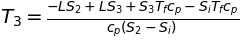

 
Right hand side:


⎡   F - U₁⋅ρ₁   ⎤
⎢               ⎥
⎢   -S₁⋅U₁⋅ρ₁   ⎥
⎢               ⎥
⎣Q - T₁⋅U₁⋅cₚ⋅ρ₁⎦

 
------------------------------------------------------------------------------------------------------------
 
Formula for U_2:


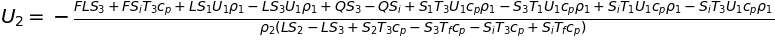

 
Q formula in U_2=0


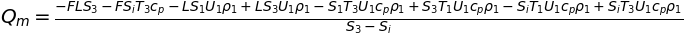

 
T3 formula in U_2=0


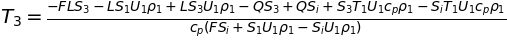

 
T3 formula in U_2=0 intercepts T_f at S*


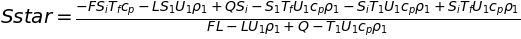

 
------------------------------------------------------------------------------------------------------------
 
Formula for U_3:


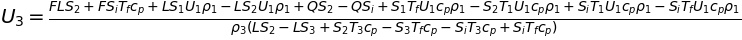

 
Q formula for U_3=0


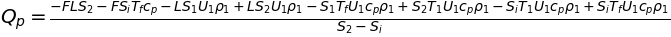

 
S_2 formula for U_3=0


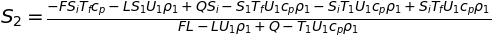

 
S_2 - Sstar formula


 
------------------------------------------------------------------------------------------------------------
 
Formula for U_i:


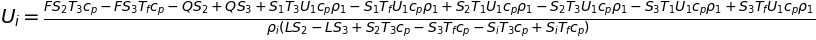

 
Q formula for U_i=0


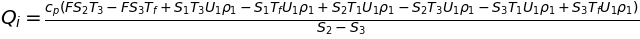

 
T3 formula in U_i=0


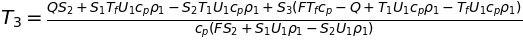

In [31]:
E = Matrix([[rho_2, rho_3, rho_i],[rho_2*S_2, rho_3*S_3, rho_i*S_i],[c_p*rho_2*T_f, c_p*rho_3*T_3, -rho_i*L]])
print("Matrix E:")
display(E)
Einv = simplify(MatrixBase.inverse_LU(E))

print(" ")
print("E inverse:")
display(Einv)

print(" ")
print("E determinant:")
Edet = simplify(MatrixBase.det(E))
display(Edet)

print(" ")
print("T3 formula for determinant=0:")
T3_formula = solve(Eq(0,Edet),T_3)
T3_formula = collect(Eq(T_3,T3_formula[0]),S_3)
display(T3_formula)

print(" ")
print("Right hand side:")
rhs = Matrix([ [F - rho_1*U_1],  [- rho_1*U_1*S_1], [Q - c_p*rho_1*U_1*T_1]])
display(rhs)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_2:")
soln = Einv*rhs
myeqn = factor(simplify(Eq(U_2,soln[0])))
display(myeqn)

print(" ")
print("Q formula in U_2=0")
myeqn = factor(simplify(Eq(0,soln[0])))
Qm_formula = simplify(solve(myeqn,Q))
Qm_formula = Eq(Q_m,Qm_formula[0])
display(Qm_formula)

print(" ")
print("T3 formula in U_2=0")
myeqn = solve(myeqn,T_3)
T3_formula = collect(Eq(T_3,myeqn[0]),S_3)
display(T3_formula)

print(" ")
print("T3 formula in U_2=0 intercepts T_f at S*")
myeqn = T3_formula.subs(T_3,T_f)
Sstar_formula = solve(myeqn,S_3)
Sstar_formula = Eq(Sstar,Sstar_formula[0])
display(Sstar_formula)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_3:")
myeqn = factor(simplify(Eq(U_3,soln[1])))
display(myeqn)

print(" ")
print("Q formula for U_3=0")
myeqn = factor(simplify(Eq(0,soln[1])))
Qp_formula = simplify(solve(myeqn,Q))
Qp_formula = Eq(Q_p,Qp_formula[0])
display(Qp_formula)

print(" ")
print("S_2 formula for U_3=0")
S2_formula = simplify(solve(myeqn,S_2))
S2_formula = Eq(S_2,S2_formula[0])
display(S2_formula)

print(" ")
print("S_2 - Sstar formula")
S2mSstar_formula = simplify(S2_formula.rhs-Sstar_formula.rhs)
S2mSstar_formula = Eq(S_2-Sstar,S2mSstar_formula)
display(S2mSstar_formula)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_i:")
myeqn = factor(simplify(Eq(U_i,soln[2])))
display(myeqn)

print(" ")
print("Q formula for U_i=0")
myeqn = factor(simplify(Eq(0,soln[2])))
Qi_formula = simplify(solve(myeqn,Q))
Qi_formula = Eq(Q_i,Qi_formula[0])
display(Qi_formula)

print(" ")
print("T3 formula in U_i=0")
myeqn = solve(myeqn,T_3)
T3_formula = collect(myeqn[0],S_3)
T3_formula = Eq(T_3,T3_formula)
display(T3_formula)

In [32]:
print(" ")
print("T3 formula in U_i=0 for S_3 = S_2")
T3_formula = simplify(T3_formula.subs(S_3,S_2))
display(T3_formula)

 
T3 formula in U_i=0 for S_3 = S_2


Approximate matrix E2:


⎡1   1   1 ⎤
⎢          ⎥
⎢S₂  S₃  0 ⎥
⎢          ⎥
⎣0   0   -L⎦

 
Approximate inverse matrix E2:


⎡  -S₃       1         -S₃    ⎤
⎢───────  ───────  ───────────⎥
⎢S₂ - S₃  S₂ - S₃  L⋅(S₂ - S₃)⎥
⎢                             ⎥
⎢   S₂      -1          S₂    ⎥
⎢───────  ───────  ───────────⎥
⎢S₂ - S₃  S₂ - S₃  L⋅(S₂ - S₃)⎥
⎢                             ⎥
⎢                      -1     ⎥
⎢   0        0         ───    ⎥
⎣                       L     ⎦

 
Approximate right hand side:


⎡   F         ⎤
⎢   ── - U₁   ⎥
⎢   ρ₀        ⎥
⎢             ⎥
⎢   -S₁⋅U₁    ⎥
⎢             ⎥
⎢Q            ⎥
⎢── - T₁⋅U₁⋅cₚ⎥
⎣ρ₀           ⎦

 
Approximate formula for U_2:


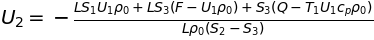

 
Approximate Q formula in U_2:


 
Approximate U_1 formula in U_2:


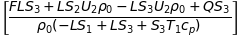

In [33]:
# Approximate solution for U_1 when U_2=0
# Set all densities the same and divide them out.
# Set Tf = S_i = 0
print("Approximate matrix E2:")
E2 = Matrix([[ 1, 1, 1],[S_2, S_3, 0],[0, 0, -L]])
display(E2)

print(" ")
print("Approximate inverse matrix E2:")
E2inv = simplify(MatrixBase.inverse_LU(E2))
display(E2inv)

print(" ")
print("Approximate right hand side:")
rhs2 = Matrix([ [F/rho_0 - U_1],  [- U_1*S_1], [Q/rho_0 - c_p*U_1*T_1]])
display(rhs2)

print(" ")
print("Approximate formula for U_2:")
soln2 = E2inv*rhs2
myeqn2 = simplify(Eq(U_2,soln2[0]))
display(myeqn2)

print(" ")
print("Approximate Q formula in U_2:")
Q_formula2 = solve(myeqn2,Q)
display(Q_formula2)

print(" ")
print("Approximate U_1 formula in U_2:")
U1_formula2 = solve(myeqn2,U_1)
display(U1_formula2)

Rearranging U2=0 system to find implicit expressions for T3 and S3.
Starting equations in T3, S3, Phi, and Ss:


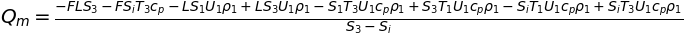

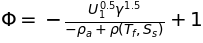

 
Eliminate T3:


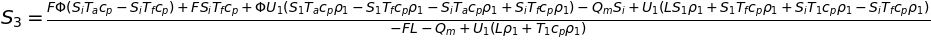

 
Eliminate Ss:


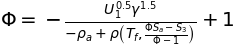

 
Eliminate S3 to obtain a single equation in Phi:


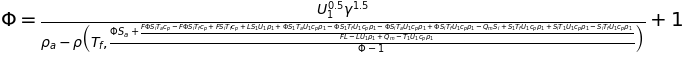

In [34]:
print("Rearranging U2=0 system to find implicit expressions for T3 and S3.")
print("Starting equations in T3, S3, Phi, and Ss:")
display(Qm_formula)
T3_formula = Eq(T_3,T_f - (T_f - T_a)*Phi)
display(T3_formula)
S3_formula = Eq(S_3,S_s - (S_s - S_a)*Phi)
display(S3_formula)
rho_s_fn = Function('rho')
Phi_formula = Eq(Phi,1 - ((gamma**(3/2))/(rho_s_fn(T_f,S_s) - rho_a)*U_1**(1/2)))
display(Phi_formula)

# Eliminate Ts
print(" ")
print("Eliminate T3:")
Qm_formula2 = Qm_formula.subs(T_3,solve(T3_formula,T_3)[0])
S3_formula2 = Eq(S_3,solve(Qm_formula2,S_3)[0]).factor(Phi,U_1,F)
display(S3_formula2)

# Eliminate Ss
print(" ")
print("Eliminate Ss:")
Ss_formula = solve(S3_formula,S_s)
Phi_formula2 = Phi_formula.subs(S_s,Ss_formula[0])
display(Phi_formula2)

# Eliminate  S3
print(" ")
print("Eliminate S3 to obtain a single equation in Phi:")
Phi_formula3 = simplify(Phi_formula2.subs(S_3,solve(S3_formula2,S_3)[0]))
display(Phi_formula3)

Approximate solution should give identical results to before:
Approximate matrix E3:


⎡1   1 ⎤
⎢      ⎥
⎣S₂  S₃⎦

 
Approximate inverse matrix E3:


⎡   S₂           -1    ⎤
⎢──────── + 1  ────────⎥
⎢-S₂ + S₃      -S₂ + S₃⎥
⎢                      ⎥
⎢    -S₂          1    ⎥
⎢  ────────    ────────⎥
⎣  -S₂ + S₃    -S₂ + S₃⎦

 
Approximate right hand side:


⎡     ⎛    T₁⋅cₚ⎞   F⋅L + Q⎤
⎢- U₁⋅⎜1 + ─────⎟ + ───────⎥
⎢     ⎝      L  ⎠     L⋅ρ₀ ⎥
⎢                          ⎥
⎣          -S₁⋅U₁          ⎦

 
Approximate U_2 solution:


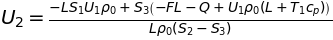

In [35]:
print("Approximate solution should give identical results to before:")
# Tinkering, even more.
# Set all densities the same and divide them out.
# Set Tf = S_i = 0
# This means we can write the problem as a 2x2 matrix:
E3 = Matrix([[ 1, 1],[S_2, S_3]])
print("Approximate matrix E3:")
display(E3)

print(" ")
print("Approximate inverse matrix E3:")
E3inv = MatrixBase.inverse_LU(E3)
display(E3inv)

print(" ")
print("Approximate right hand side:")
rhs3 = Matrix([ [(1/(rho_0*L))*(Q + F*L) - U_1*(1+c_p*T_1/L)],  [- U_1*S_1]])
display(rhs3)

print(" ")
print("Approximate U_2 solution:")
soln3 = E3inv*rhs3
myeqn3 = Eq(U_2,soln3[0])
display(simplify(myeqn3))

Shelf system matrix E4:


⎡   ρ₁      ρᵢ  ⎤
⎢               ⎥
⎢ S₁⋅ρ₁    Sᵢ⋅ρᵢ⎥
⎢               ⎥
⎣T₁⋅cₚ⋅ρ₁  -L⋅ρᵢ⎦

 
Column null space:


⎡-(-S₁⋅ρ₁⋅(-L⋅ρ₁⋅ρᵢ - T₁⋅cₚ⋅ρ₁⋅ρᵢ) + T₁⋅cₚ⋅ρ₁⋅(-S₁⋅ρ₁⋅ρᵢ + Sᵢ⋅ρ₁⋅ρᵢ)) ⎤
⎢─────────────────────────────────────────────────────────────────────⎥
⎢                      ρ₁⋅(-S₁⋅ρ₁⋅ρᵢ + Sᵢ⋅ρ₁⋅ρᵢ)                      ⎥
⎢                                                                     ⎥
⎢                     -(-L⋅ρ₁⋅ρᵢ - T₁⋅cₚ⋅ρ₁⋅ρᵢ)                       ⎥
⎢                     ──────────────────────────                      ⎥
⎢                        -S₁⋅ρ₁⋅ρᵢ + Sᵢ⋅ρ₁⋅ρᵢ                         ⎥
⎢                                                                     ⎥
⎣                                  1                                  ⎦

 
Right hand side:


⎡   F - ρₛ⋅uₛ    ⎤
⎢                ⎥
⎢   -Sₛ⋅ρₛ⋅uₛ    ⎥
⎢                ⎥
⎣Q - T_f⋅cₚ⋅ρₛ⋅uₛ⎦

 
Formula for F:


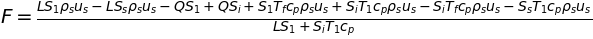

In [36]:
# Singular vector for the shelf matrix system
E4 = Matrix([[ rho_1, rho_i],[rho_1*S_1, rho_i*S_i],[c_p*rho_1*T_1,-rho_i*L]])
print("Shelf system matrix E4:")
display(E4)

# nullspace of E4 transpose is outside the range of E4:
print(" ")
print("Column null space:")
column_null_space = E4.T.nullspace()[0]
display(column_null_space)

# Form linear relation between F and Q
print(" ")
print("Right hand side:")
rhs4 = Matrix([ [F - rho_s*u_s],  [- rho_s*u_s*S_s], [Q - c_p*rho_s*u_s*T_f]])
display(rhs4)
print(" ")
print("Formula for F:")
tmp = (rhs4.T)*column_null_space
myeqn4 = Eq(tmp[0],0)
tmp2 = solve(myeqn4,F)
display(simplify(Eq(tmp2[0],F)))